In [110]:
import requests
from bs4 import BeautifulSoup
import jieba
import datetime

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [111]:
jieba.set_dictionary('/Users/linjiaying/Desktop/ICT-Python-101/data/dict.txt.big')

In [112]:
def fetch(url):
    res = requests.get(url, cookies={'over18': '1'})
    soup = BeautifulSoup(res.text ,"html")
    return soup

def get_title(data):
    title_divs = data.select("div.r-ent")
    l = []
    for divs in title_divs:
        # print("--div--")
        # print(divs)
        # print("--")
        a = divs.find('a')
        if not a:
            continue
        try:
            date = divs.select('div.date')[0].text.strip()
            month, day = date.split('/')
            date = datetime.datetime(2024, int(month), int(day))
            push_block = divs.select('div.nrec span')
            push_count = int(push_block[0].text.strip())
            l.append((a.text, 'https://www.ptt.cc'+a['href'], date, push_count))
        except:
            pass
    return l

def get_prev(data):
    paging_div = data.find('div', 'btn-group btn-group-paging')
    prev_url = 'https://www.ptt.cc' + paging_div.find_all('a')[1]['href']
    return prev_url

In [70]:
def get_data(start_url, start_date, end_date):
    
    titles = []

    url = start_url
    is_first = True
    
    while True:

        result = fetch(url)
        new_titles = get_title(result)
        
        flag = False
        for new_title in new_titles:
            date = new_title[2]
            if date >= start_date and date <= end_date:
                titles.append(new_title)
            if date >= start_date:
                flag = True
    
        if not is_first and not flag:
            break
            
        url = get_prev(result)
    
        if is_first == True:
            is_first = False

    return titles

In [71]:
def get_keyword_data(start_url, start_date, end_date, keyword_list):

    url = start_url
    is_first = True

    keyword_data = {}
    for keyword in keyword_list:
        keyword_data[keyword] = {}

    while True:

        result = fetch(url)
        new_titles = get_title(result)

        flag = False
        for new_title in new_titles:
            text = new_title[0]
            date = new_title[2]
            if date >= start_date and date <= end_date:

                date_s = date.strftime("%Y-%m-%d")

                for keyword in keyword_list:
                    if keyword in text:
                        if date_s in keyword_data[keyword]:
                            keyword_data[keyword][date_s] += 1
                        else:
                            keyword_data[keyword][date_s] = 1
                
            if date >= start_date:
                flag = True
    
        if not is_first and not flag:
            break

        url = get_prev(result)

        if is_first:
            is_first = False

    return keyword_data

In [72]:
start_url = "https://www.ptt.cc/bbs/Gossiping/index.html"
start_date = datetime.datetime(2024, 3, 2)
end_date = datetime.datetime(2024, 3, 3)
data = get_keyword_data(start_url, start_date, end_date, ['烏克蘭', '芙莉蓮'])

In [73]:
print(data)

{'烏克蘭': {'2024-03-03': 3, '2024-03-02': 5}, '芙莉蓮': {'2024-03-02': 3}}


In [45]:
keyword = {}
for title in titles:
    text = title[0]
    text_tokenized = list(jieba.cut(text, cut_all=True))
    for v in text_tokenized:
        if len(v) < 2:
            continue
        if v in keyword:
            keyword[v][0] += 1
            keyword[v][1] += title[3]
        else:
            keyword[v] = [1, title[3]]
print(keyword)
    # break

{'21': [44, 661], '上午': [9, 115], '桃園': [49, 832], '南昌': [3, 22], '街口': [3, 12], '行車': [19, 90], '東海': [4, 43], '東海大學': [1, 21], '海大': [1, 21], '大學': [166, 1604], '中研': [4, 135], '中研院': [4, 135], '院士': [1, 21], '數量': [6, 47], '居然': [27, 315], '前三名': [3, 78], '三名': [6, 97], '有人': [565, 4646], '發現': [460, 4037], '最近': [82, 973], '信貸': [6, 42], '融資': [1, 4], '電話': [51, 617], '開始': [216, 1906], '欣賞': [2, 9], '賞花': [2, 5], '花草': [1, 2], '花草樹木': [1, 2], '樹木': [2, 28], '症狀': [4, 16], '行人': [76, 672], '綠燈': [20, 102], '開時': [1, 3], '減少': [23, 274], '車輛': [8, 65], '秒數': [2, 8], '新聞': [7886, 125626], '接種': [3, 31], '疫苗': [13, 88], '有沒有': [607, 4200], '沒有': [965, 7456], '四年': [24, 122], '一次': [99, 1177], '難得': [1, 2], '文章': [13, 60], '快訊': [357, 8209], '貨車': [27, 579], '警局': [8, 139], '駕駛': [57, 1042], '分鐘': [48, 874], 'Re': [7828, 43312], '國防': [35, 454], '國防部': [28, 332], '防部': [31, 346], '中共': [98, 742], '發射': [19, 261], '發射衛星': [2, 39], '衛星': [9, 115], '高度': [11, 115], '大氣': [5, 67], '大氣層': [

In [46]:
keyword_l = list(keyword.items())
keyword_l[:10]

[('21', [44, 661]),
 ('上午', [9, 115]),
 ('桃園', [49, 832]),
 ('南昌', [3, 22]),
 ('街口', [3, 12]),
 ('行車', [19, 90]),
 ('東海', [4, 43]),
 ('東海大學', [1, 21]),
 ('海大', [1, 21]),
 ('大學', [166, 1604])]

In [47]:
keyword_l.sort(key=lambda x: x[1][0], reverse=True)

In [48]:
keyword_l[:20]

[('新聞', [7886, 125626]),
 ('Re', [7828, 43312]),
 ('什麼', [3143, 28923]),
 ('怎麼', [1918, 17192]),
 ('不是', [1862, 14889]),
 ('是不是', [1644, 12491]),
 ('沒有', [965, 7456]),
 ('日本', [927, 10740]),
 ('中國', [873, 8928]),
 ('八卦', [867, 6532]),
 ('現在', [799, 6896]),
 ('可以', [767, 7164]),
 ('真的', [627, 6593]),
 ('有沒有', [607, 4200]),
 ('有人', [565, 4646]),
 ('過年', [506, 3271]),
 ('沒人', [488, 4507]),
 ('還是', [486, 4106]),
 ('發現', [460, 4037]),
 ('小雞', [459, 5548])]

In [49]:
keyword_l.sort(key=lambda x: x[1][1], reverse=True)
keyword_l[:20]

[('新聞', [7886, 125626]),
 ('Re', [7828, 43312]),
 ('什麼', [3143, 28923]),
 ('怎麼', [1918, 17192]),
 ('不是', [1862, 14889]),
 ('是不是', [1644, 12491]),
 ('日本', [927, 10740]),
 ('中國', [873, 8928]),
 ('快訊', [357, 8209]),
 ('沒有', [965, 7456]),
 ('可以', [767, 7164]),
 ('現在', [799, 6896]),
 ('真的', [627, 6593]),
 ('八卦', [867, 6532]),
 ('瘦肉', [321, 5593]),
 ('小雞', [459, 5548]),
 ('瘦肉精', [317, 5540]),
 ('韓國', [362, 4661]),
 ('有人', [565, 4646]),
 ('晚安', [343, 4508])]

In [53]:
keyword_feb

[('新聞', [7886, 125626]),
 ('Re', [7828, 43312]),
 ('什麼', [3143, 28923]),
 ('怎麼', [1918, 17192]),
 ('不是', [1862, 14889]),
 ('是不是', [1644, 12491]),
 ('日本', [927, 10740]),
 ('中國', [873, 8928]),
 ('快訊', [357, 8209]),
 ('沒有', [965, 7456]),
 ('可以', [767, 7164]),
 ('現在', [799, 6896]),
 ('真的', [627, 6593]),
 ('八卦', [867, 6532]),
 ('瘦肉', [321, 5593]),
 ('小雞', [459, 5548]),
 ('瘦肉精', [317, 5540]),
 ('韓國', [362, 4661]),
 ('有人', [565, 4646]),
 ('晚安', [343, 4508]),
 ('沒人', [488, 4507]),
 ('台糖', [229, 4318]),
 ('有沒有', [607, 4200]),
 ('還是', [486, 4106]),
 ('多少', [424, 4040]),
 ('發現', [460, 4037]),
 ('到底', [424, 4018]),
 ('這麼', [407, 3919]),
 ('」！', [187, 3881]),
 ('柯文', [242, 3802]),
 ('台中', [239, 3765]),
 ('印度', [331, 3602]),
 ('一個', [341, 3514]),
 ('過年', [506, 3271]),
 ('台北', [300, 3250]),
 ('一堆', [296, 3205]),
 ('美國', [318, 3173]),
 ('大家', [400, 3081]),
 ('10', [225, 3060]),
 ('怎樣', [339, 2944]),
 ('黃國', [161, 2933]),
 ('自己', [308, 2868]),
 ('柬埔寨', [244, 2855]),
 ('如果', [337, 2851]),
 ('克蘭', [265, 

In [74]:
start_url = "https://www.ptt.cc/bbs/Gossiping/index.html"
start_date = datetime.datetime(2024, 2, 1)
end_date = datetime.datetime(2024, 2, 29)
data = get_keyword_data(start_url, start_date, end_date, ['日本', '中國', '瘦肉', '小雞', '韓國'])

In [75]:
data

{'日本': {'2024-02-29': 25,
  '2024-02-28': 40,
  '2024-02-27': 31,
  '2024-02-26': 51,
  '2024-02-25': 63,
  '2024-02-24': 43,
  '2024-02-23': 31,
  '2024-02-22': 23,
  '2024-02-21': 18,
  '2024-02-20': 14,
  '2024-02-19': 27,
  '2024-02-18': 33,
  '2024-02-17': 22,
  '2024-02-16': 40,
  '2024-02-15': 35,
  '2024-02-14': 65,
  '2024-02-13': 47,
  '2024-02-12': 55,
  '2024-02-11': 18,
  '2024-02-10': 19,
  '2024-02-09': 23,
  '2024-02-08': 12,
  '2024-02-07': 31,
  '2024-02-06': 27,
  '2024-02-05': 25,
  '2024-02-04': 25,
  '2024-02-03': 22,
  '2024-02-02': 17,
  '2024-02-01': 27},
 '中國': {'2024-02-29': 37,
  '2024-02-28': 19,
  '2024-02-27': 31,
  '2024-02-26': 29,
  '2024-02-25': 25,
  '2024-02-24': 32,
  '2024-02-23': 23,
  '2024-02-22': 70,
  '2024-02-21': 24,
  '2024-02-20': 46,
  '2024-02-19': 30,
  '2024-02-18': 36,
  '2024-02-17': 24,
  '2024-02-16': 37,
  '2024-02-15': 23,
  '2024-02-14': 24,
  '2024-02-13': 37,
  '2024-02-12': 21,
  '2024-02-11': 18,
  '2024-02-10': 29,
  '2024

In [76]:
import matplotlib.pyplot as plt

### 繪製成直方圖

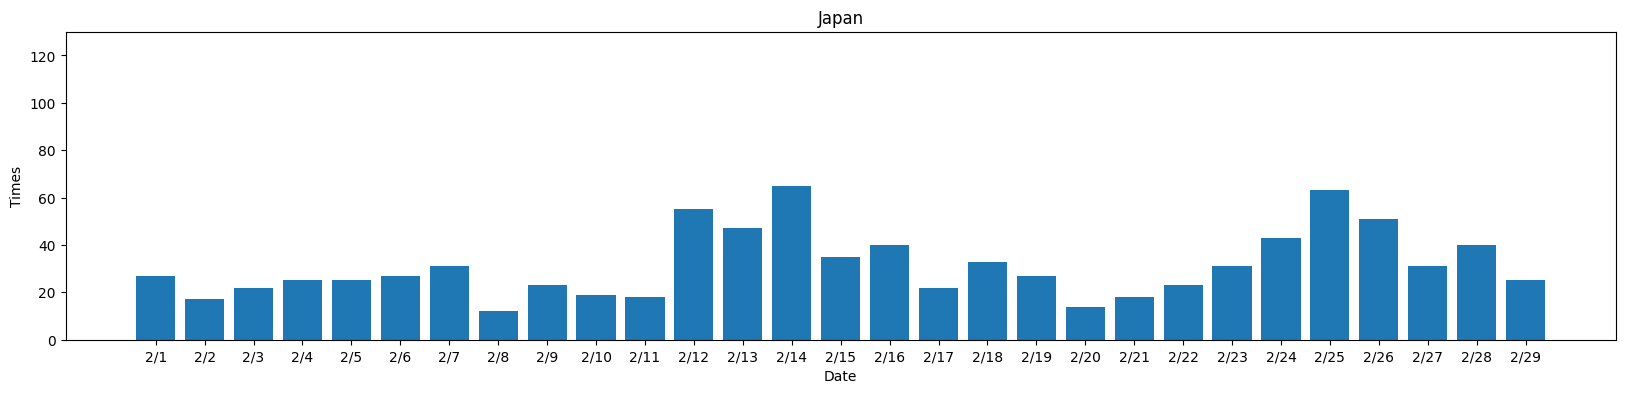

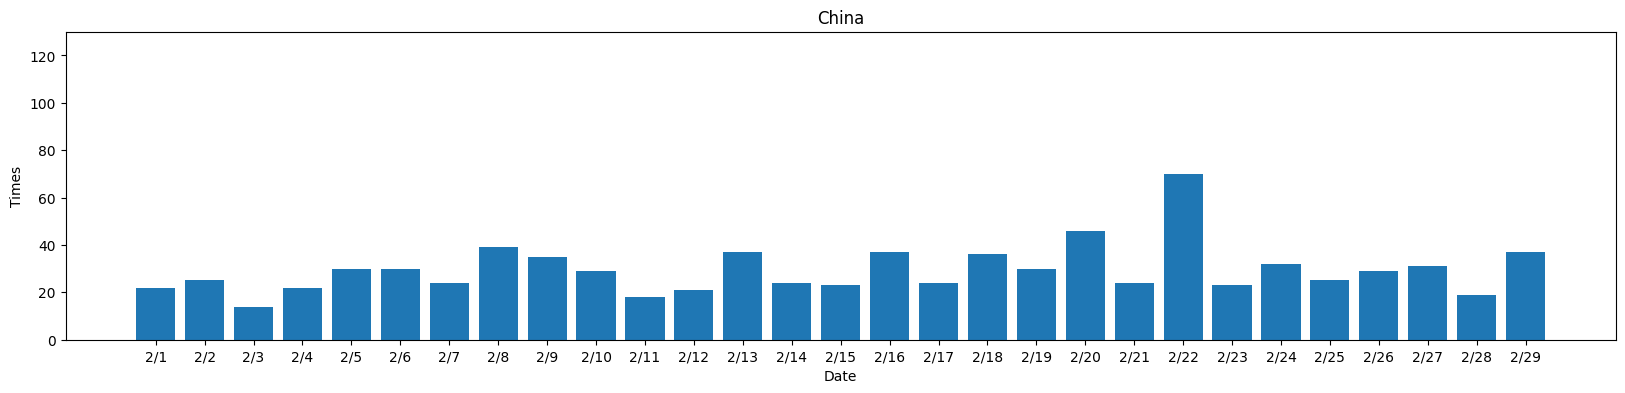

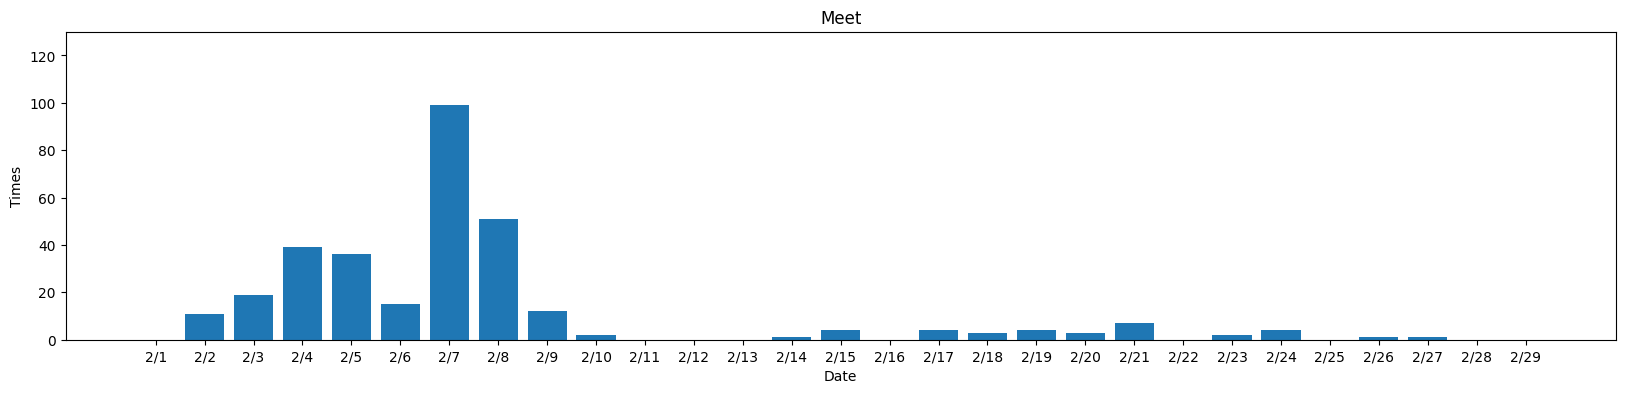

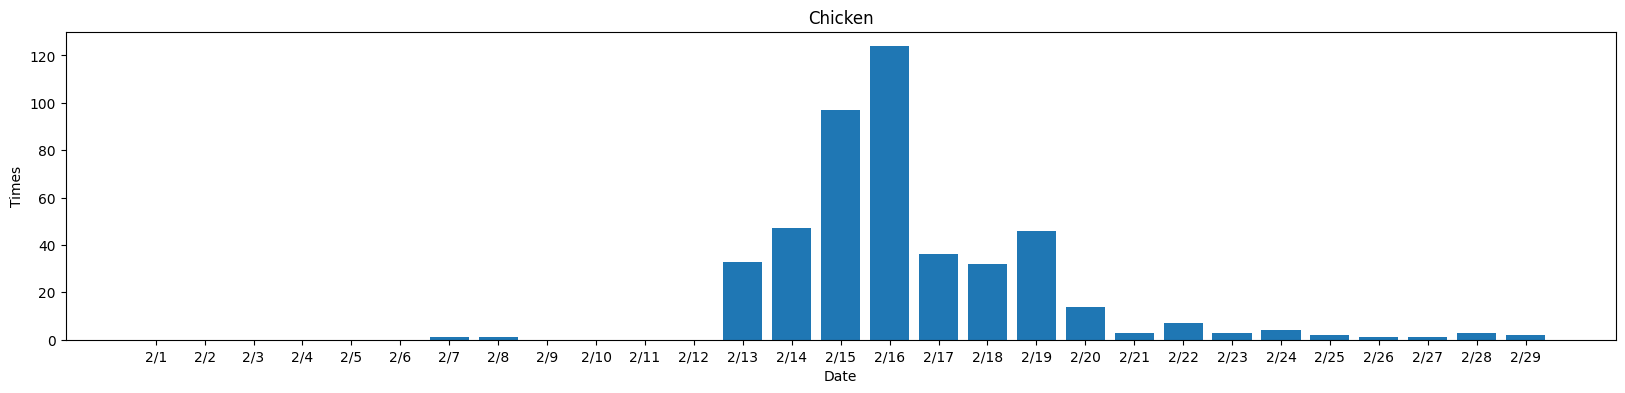

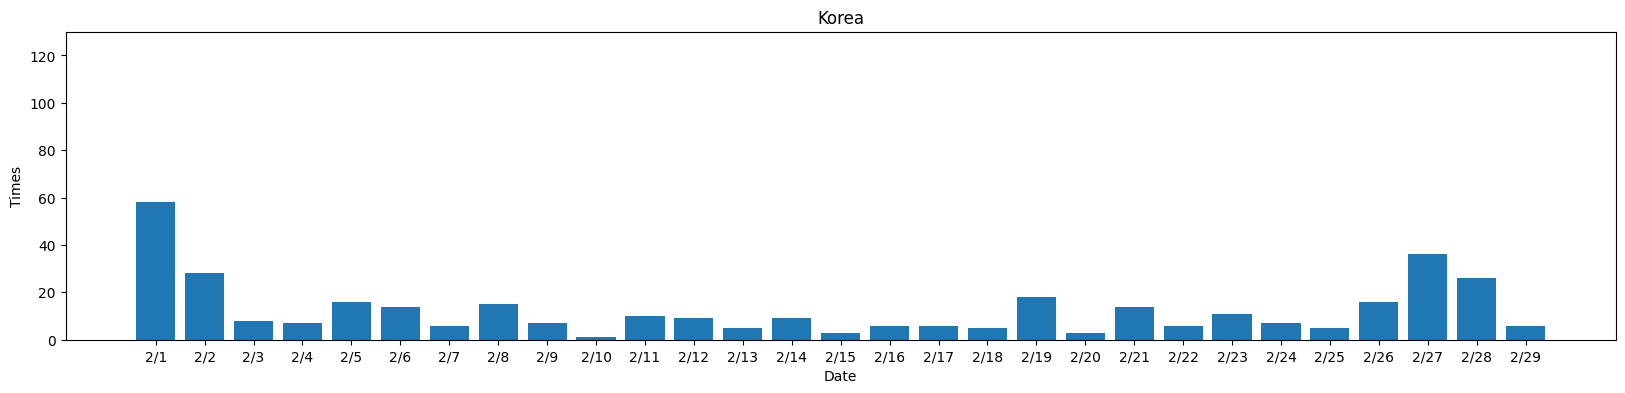

In [109]:
fig_titles = ['Japan', 'China', 'Meet', 'Chicken', 'Korea']
for index, keyword in enumerate(['日本', '中國', '瘦肉', '小雞', '韓國']):
    l = []
    for i in range(1, 30):
        s = '2024-02-' + f'{i:02d}'
        if s in data[keyword]:
            l.append(data[keyword][s])
        else:
            l.append(0)
    plt.figure(figsize=(20, 4))
    plt.bar(list(range(29)), l)
    plt.xticks(list(range(29)), [f'2/{x+1}' for x in range(29)])
    plt.xlabel('Date')
    plt.ylabel('Times')
    plt.ylim(0, 130)
    plt.title(fig_titles[index])
    plt.show()